In [1]:
import json
from haralyzer import HarParser
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_HAR(file):
    
    with open (file, 'r') as f:
        data = json.loads(f.read())
    
    parser = HarParser(data)

    return parser

In [3]:
def Page_Load_Time():

    parser = load_HAR('IndiaPost_nothrottle.har')
    parser1 = load_HAR('IndiaPost_Config1.har')
    parser2 = load_HAR('IndiaPost_Config2.har')
    parser3 = load_HAR('IndiaPost_Config3.har')

    total_page_load_time = 0
    total_page_load_time_config1 = 0
    total_page_load_time_config2 = 0
    total_page_load_time_config3 = 0
    
    for page in parser.pages:
        total_page_load_time += (page.page_load_time)

    for page in parser1.pages:
        total_page_load_time_config1 += (page.page_load_time)

    for page in parser2.pages:
        total_page_load_time_config2 += (page.page_load_time)

    for page in parser3.pages:
        total_page_load_time_config3 += (page.page_load_time)
    
    print("Total page load time for no throttle: ", total_page_load_time)
    print("Total page load time for Config 1: ", total_page_load_time_config1)
    print("Total page load time for Config 2: ", total_page_load_time_config2)
    print("Total page load time for Config 3: ", total_page_load_time_config3)

In [4]:
def Request_Data_Transfer_Summary_AUX(file):

    parser = load_HAR(file)
    
    total_requests = 0
    total_data_in_response = 0
    
    for page in parser.pages:

        for entry in page.entries:

            total_requests += 1
            total_data_in_response += entry['response']['_transferSize']
    
    print("Total number of requests : ", total_requests)
    print("Total size of data transferred in response to these requests : ", total_data_in_response, " bytes")

In [5]:
def Request_Data_Transfer_Summary():

    print("For IndiaPost_nothrottle.har->")
    Request_Data_Transfer_Summary_AUX('IndiaPost_nothrottle.har')

    print()

    print("For IndiaPost_Config1.har->")
    Request_Data_Transfer_Summary_AUX('IndiaPost_Config1.har')

    print()

    print("For IndiaPost_Config2.har->")
    Request_Data_Transfer_Summary_AUX('IndiaPost_Config2.har')

    print()

    print("For IndiaPost_Config3.har->")
    Request_Data_Transfer_Summary_AUX('IndiaPost_Config3.har')

    print()

In [6]:
def Content_Type_Analysis_AUX(file):

    parser = load_HAR(file)
    
    text_html_requests = 0
    text_html_data = 0
    text_css_requests = 0
    text_css_data = 0
    application_javascript_requests = 0
    application_javascript_data = 0
    image_requests = 0
    image_data = 0
    
    for page in parser.pages:
    
        for entry in page.entries:
    
            content = entry.response.mimeType
    
            if content.startswith("text/html"):
    
                text_html_requests += 1
                text_html_data += (entry['response']['_transferSize'])
                #text_html_data += (entry['response']['_transferSize'] + entry['request']['headersSize'] + entry['request']['bodySize'])
    
            elif content.startswith("text/css"):
                
                text_css_requests += 1
                text_css_data += (entry['response']['_transferSize'])
                #text_css_data += (entry['response']['_transferSize'] + entry['request']['headersSize'] + entry['request']['bodySize'])
    
            elif content.startswith("application/javascript"):
                
                application_javascript_requests += 1
                application_javascript_data += (entry['response']['_transferSize'])
                #application_javascript_data += (entry['response']['_transferSize'] + entry['request']['headersSize'] + entry['request']['bodySize'])
    
            elif content.startswith("image"):
                
                image_requests += 1
                image_data += (entry['response']['_transferSize'])
                #image_data += (entry['response']['_transferSize'] + entry['request']['headersSize'] + entry['request']['bodySize'])
    
    
    print("Total number of text/html requests : ", text_html_requests, " and the total data transferred : ", text_html_data, " bytes")
    print("Total number of text/css requests : ", text_css_requests, " and the total data transferred : ", text_css_data, " bytes")
    print("Total number of application/javascript requests : ", application_javascript_requests, " and the total data transferred : ", application_javascript_data, " bytes")
    print("Total number of image requests : ", image_requests, " and the total data transferred : ", image_data, " bytes")

In [7]:
def Content_Type_Analysis():

    print("For IndiaPost_nothrottle.har->")
    Content_Type_Analysis_AUX('IndiaPost_nothrottle.har')

    print()

    print("For IndiaPost_Config1.har->")
    Content_Type_Analysis_AUX('IndiaPost_Config1.har')

    print()

    print("For IndiaPost_Config2.har->")
    Content_Type_Analysis_AUX('IndiaPost_Config2.har')

    print()

    print("For IndiaPost_Config3.har->")
    Content_Type_Analysis_AUX('IndiaPost_Config3.har')

In [8]:
def CDF_Download_Time():

    plt.figure(figsize = (10,6))

    files = ["IndiaPost_nothrottle.har", "IndiaPost_Config1.har", "IndiaPost_Config2.har", "IndiaPost_Config3.har"]

    for i in files:

        parser = load_HAR(i)
        
        download = []
        
        for page in parser.pages:
        
            for entry in page.entries:
        
                temp = entry['timings']['receive']
        
                if temp > 0:
        
                    download.append(temp)
        
        download.sort()
        
        y_axis = np.arange(1,len(download)+1) / len(download)
        
        plt.plot(download, y_axis, label = i)
    
    plt.xlabel("Time (ms)")
    plt.ylabel("Cumulative probability")
    plt.title("CDF of Download Times")
    plt.legend()
    plt.grid(True)
    plt.show()

In [9]:
def CDF_Response_Size():

    files = ["IndiaPost_nothrottle.har", "IndiaPost_Config1.har", "IndiaPost_Config2.har", "IndiaPost_Config3.har"]

    fig, axes = plt.subplots(4, 1, figsize = (10, 10), sharex = True, sharey = True)

    for i in range(len(files)):

        parser = load_HAR(files[i])
        
        download = []
        
        for page in parser.pages:
        
            for entry in page.entries:
        
                temp = entry['response']['_transferSize']
        
                if temp > 0:
        
                    download.append(temp)
        
        download.sort()
        
        y_axis = np.arange(1,len(download)+1) / len(download)
        
        axes[i].plot(download, y_axis, label = files[i])
        axes[i].legend(loc = 'lower right')
        axes[i].grid(True)
        axes[i].set_xscale('log')

    fig.suptitle("CDF of Download Sizes")
    fig.text(0.5, 0.04, 'Download Size (bytes)', ha='center', fontsize=12)
    fig.text(0.04, 0.5, 'Cumulative Probability', va='center', rotation='vertical', fontsize=12)
    
    plt.show()

In [10]:
def ScatterPlot_Size_vs_DownloadTime():

    files = ["IndiaPost_nothrottle.har", "IndiaPost_Config1.har", "IndiaPost_Config2.har", "IndiaPost_Config3.har"]

    fig, axes = plt.subplots(4, 1, figsize = (10, 10), sharex = True, sharey = True)

    for i in range(len(files)):

        parser = load_HAR(files[i])
        
        download = []
        size = []
        
        for page in parser.pages:
        
            for entry in page.entries:
        
                temp = entry['response']['_transferSize']
                temp2 = entry['timings']['receive']
        
                if temp > 0 and temp2 > 0:
        
                    download.append(temp2)
                    size.append(temp)

        
        axes[i].scatter(size, download, label = files[i])
        axes[i].legend(loc = 'lower right')
        axes[i].grid(True)
        axes[i].set_yscale('log')
        axes[i].set_xscale('log')

    fig.suptitle("Scatter Plot")
    fig.text(0.5, 0.04, 'Download Time (ms)', ha='center', fontsize=12)
    fig.text(0.04, 0.5, 'Download Size (bytes)', va='center', rotation='vertical', fontsize=12)
    
    plt.show()

In [11]:
Page_Load_Time()

Total page load time for no throttle:  12193.561000000045
Total page load time for Config 1:  334189.60999999946
Total page load time for Config 2:  42902.20899999986
Total page load time for Config 3:  28181.34899999859


In [12]:
Request_Data_Transfer_Summary()

For IndiaPost_nothrottle.har->
Total number of requests :  103
Total size of data transferred in response to these requests :  5727310  bytes

For IndiaPost_Config1.har->
Total number of requests :  103
Total size of data transferred in response to these requests :  5337473  bytes

For IndiaPost_Config2.har->
Total number of requests :  103
Total size of data transferred in response to these requests :  5732523  bytes

For IndiaPost_Config3.har->
Total number of requests :  103
Total size of data transferred in response to these requests :  2822433  bytes



In [13]:
Content_Type_Analysis()

For IndiaPost_nothrottle.har->
Total number of text/html requests :  1  and the total data transferred :  37953  bytes
Total number of text/css requests :  22  and the total data transferred :  375235  bytes
Total number of application/javascript requests :  23  and the total data transferred :  2705564  bytes
Total number of image requests :  47  and the total data transferred :  2340846  bytes

For IndiaPost_Config1.har->
Total number of text/html requests :  1  and the total data transferred :  37960  bytes
Total number of text/css requests :  22  and the total data transferred :  361969  bytes
Total number of application/javascript requests :  23  and the total data transferred :  2486142  bytes
Total number of image requests :  47  and the total data transferred :  2178179  bytes

For IndiaPost_Config2.har->
Total number of text/html requests :  1  and the total data transferred :  37999  bytes
Total number of text/css requests :  22  and the total data transferred :  375236  byte

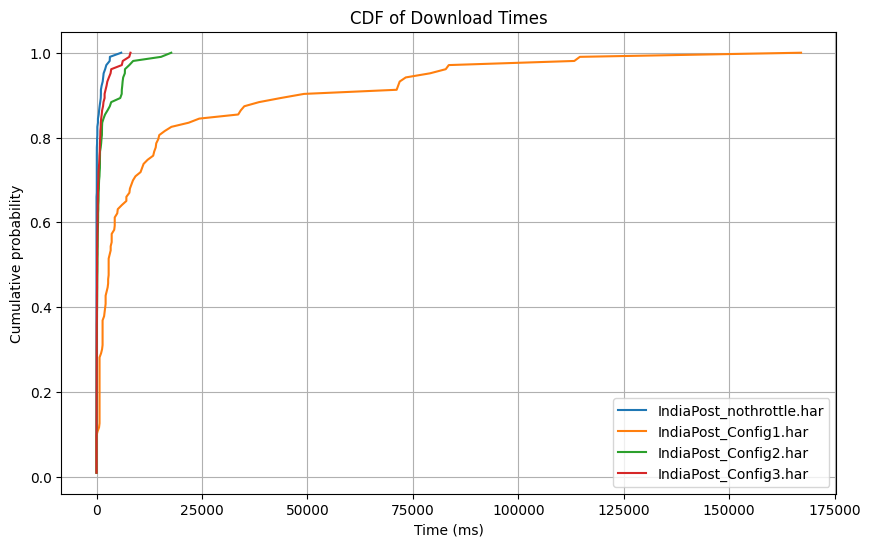

In [14]:
CDF_Download_Time()

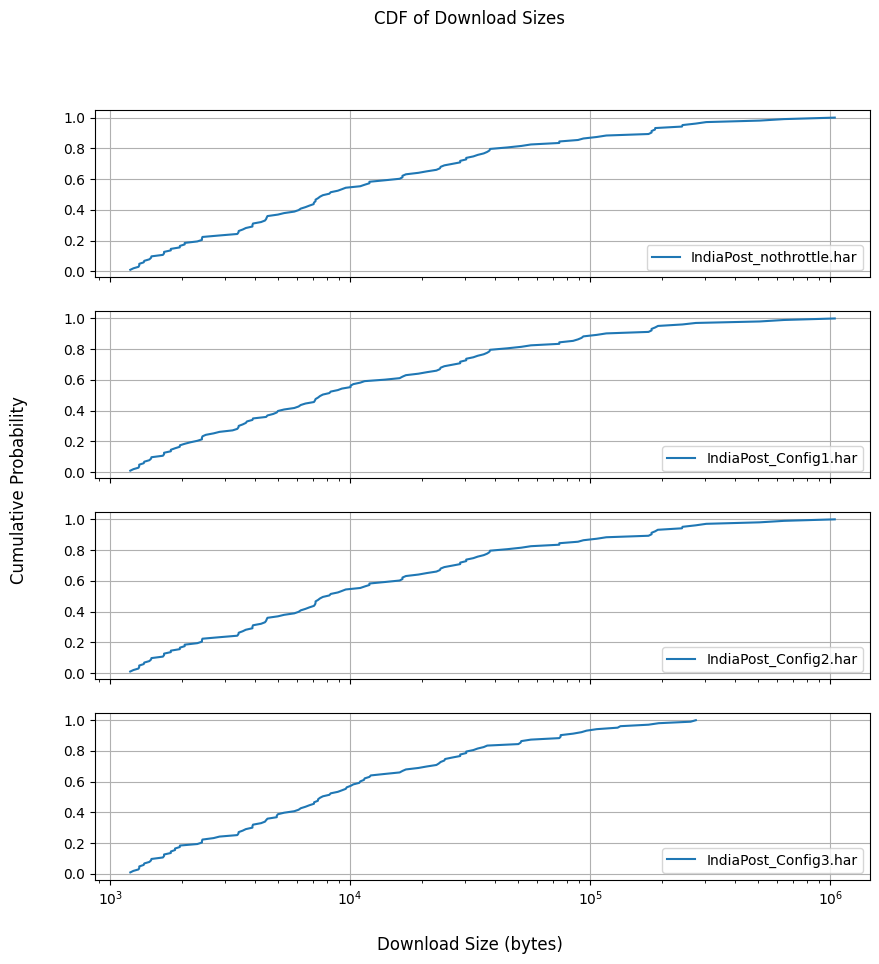

In [15]:
CDF_Response_Size()

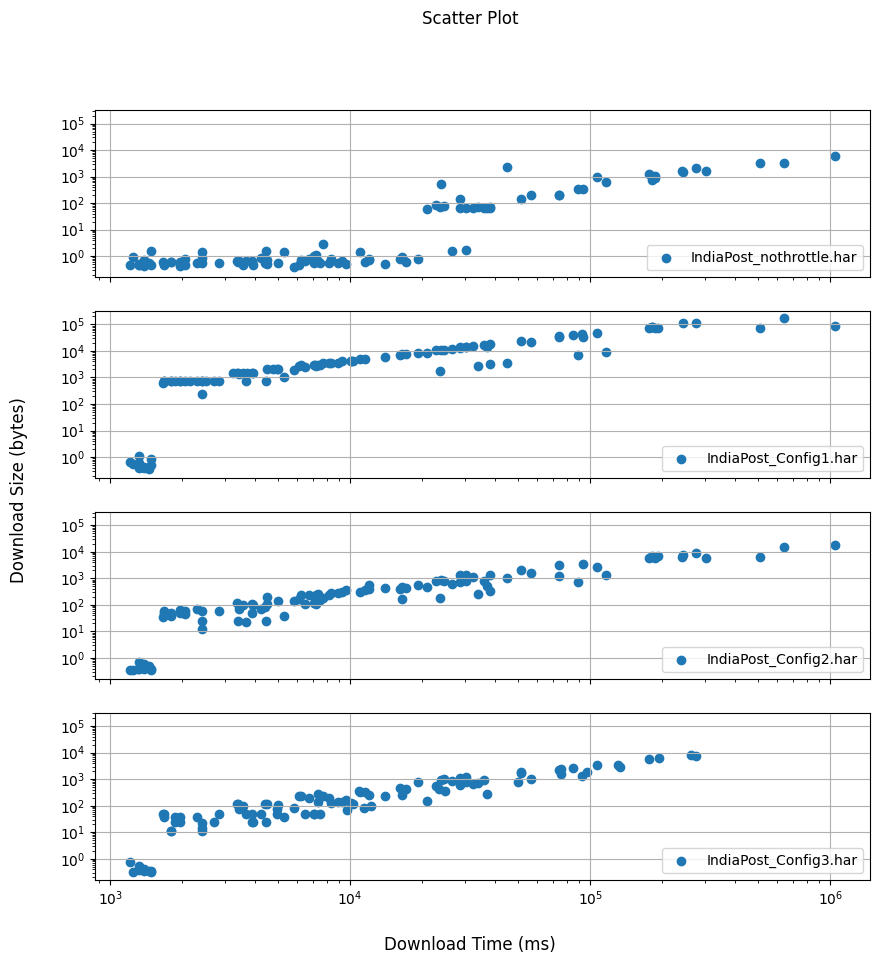

In [16]:
ScatterPlot_Size_vs_DownloadTime()